# **Instalando pyspark utilizando pip e configurando a sessao**

In [160]:
!pip install pyspark
from pyspark.sql import SparkSession

# Configuração da sessão Spark
spark = SparkSession.builder \
    .appName("Análise de Combustíveis") \
    .getOrCreate()


# **Carregando arquivo CSV localmente**

In [161]:
# Carregar dados do arquivo local no Colab
file_path = '/content/combustiveis (4).csv'
df_spark = spark.read.csv(file_path, header=True, inferSchema=True, sep=';')


# **Limpeza e Preparação de Dados no Spark**

Conversão de tipos, remoção de colunas irrelevantes e exclusão de valores nulos para análise confiável e precisa.

In [162]:
# operações de limpeza e processamento
df_spark = df_spark.withColumn('Valor de Venda', df_spark['Valor de Venda'].cast('double'))
df_spark = df_spark.drop('Valor de Compra')

df_spark = df_spark.na.drop()  # Remove linhas com valores nulos



# **Contagem de Valores Nulos no Spark**

Identificação e contagem de valores nulos por coluna para avaliação da qualidade dos dados.

In [163]:
from pyspark.sql.functions import col, isnan, when, count

# Contagem de valores nulos por coluna
null_counts = df_spark.select([count(when(col(c).isNull(), c)).alias(c) for c in df_spark.columns])

# Mostrar resultados
null_counts.show()


+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+-----------------+--------+
|Regiao - Sigla|Estado - Sigla|Municipio|Revenda|CNPJ da Revenda|Nome da Rua|Numero Rua|Complemento|Bairro|Cep|Produto|Data da Coleta|Valor de Venda|Unidade de Medida|Bandeira|
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+-----------------+--------+
|             0|             0|        0|      0|              0|          0|         0|          0|     0|  0|      0|             0|             0|                0|       0|
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+-----------------+--------+




# **Remoção de Linhas com Valores Nulos**
Remoção de todas as linhas que contêm valores nulos em qualquer coluna para garantir a integridade dos dados.

In [164]:
# Remove linhas com valores nulos em qualquer coluna
df_spark = df_spark.dropna()



# **Exibição da Contagem de Valores Nulos por Coluna**
Mostrar a quantidade de valores nulos em cada coluna do DataFrame para identificar colunas com dados ausentes.

In [ ]:
# Mostrar resultados
null_counts.show()

# **Visualização da Distribuição do Valor de Venda**
Plotar a distribuição do Valor de Venda para analisar a dispersão e identificar possíveis outliers no dataset.

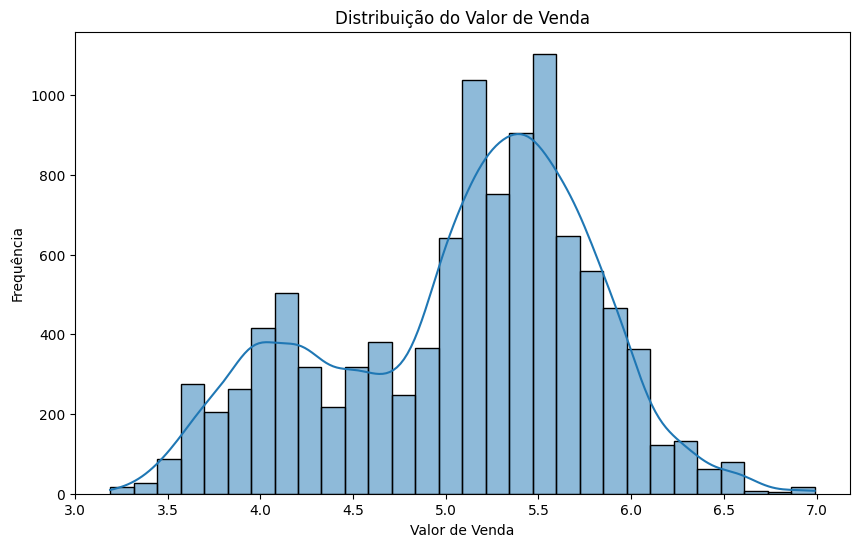

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemplo de visualização de distribuição
plt.figure(figsize=(10, 6))
sns.histplot(df_spark.toPandas(), x='Valor de Venda', bins=30, kde=True)
plt.title('Distribuição do Valor de Venda')
plt.xlabel('Valor de Venda')
plt.ylabel('Frequência')
plt.show()


# **Variação de Preços por Produto: Análise de Distribuição e Tendências de Venda**

Variação de Preços por Produto: Boxplot dos preços de venda, mostrando a distribuição e medianas por categoria de produto

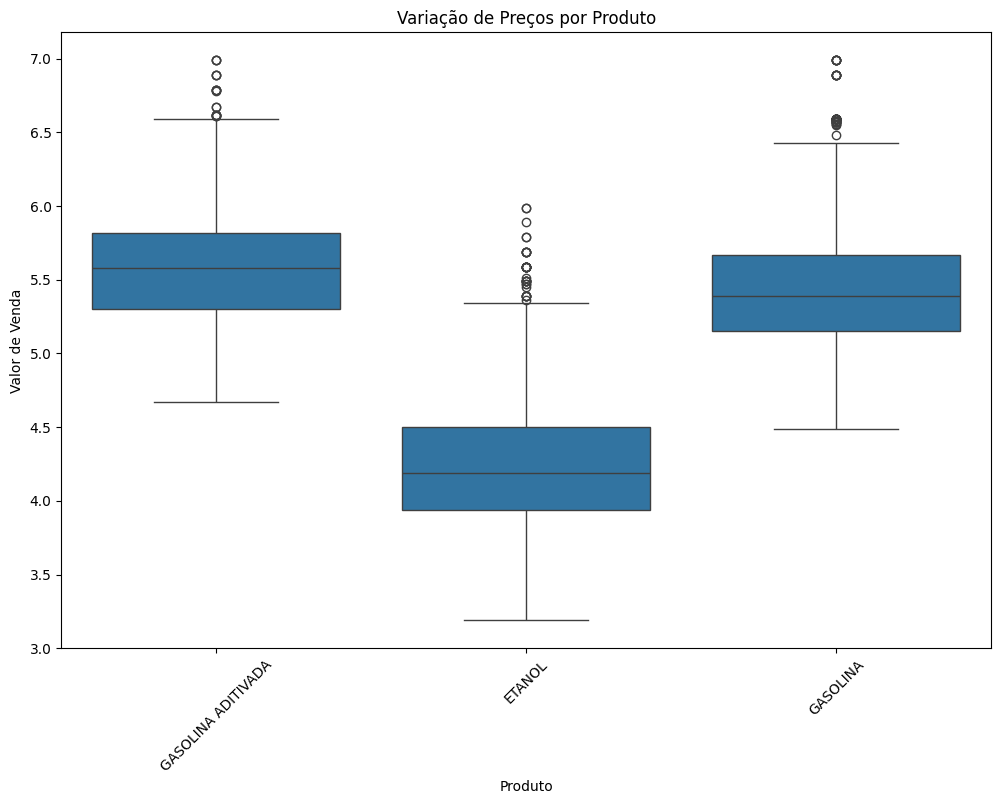

In [150]:
# Boxplot de preço por produto
df_products = df_spark.groupBy('Produto').agg({'Valor de Venda': 'mean'})
products = [row.Produto for row in df_products.collect()]

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_spark.toPandas(), x='Produto', y='Valor de Venda', order=products)
plt.title('Variação de Preços por Produto')
plt.xlabel('Produto')
plt.ylabel('Valor de Venda')
plt.xticks(rotation=45)
plt.show()


# **Variação de Preços Médios por Bandeira**

Análise da média de preços de venda agrupados por bandeira de revenda.



<ipython-input-151-4e799ad5d597>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_brand_price.toPandas(), x='Bandeira', y='avg(Valor de Venda)', palette='viridis')


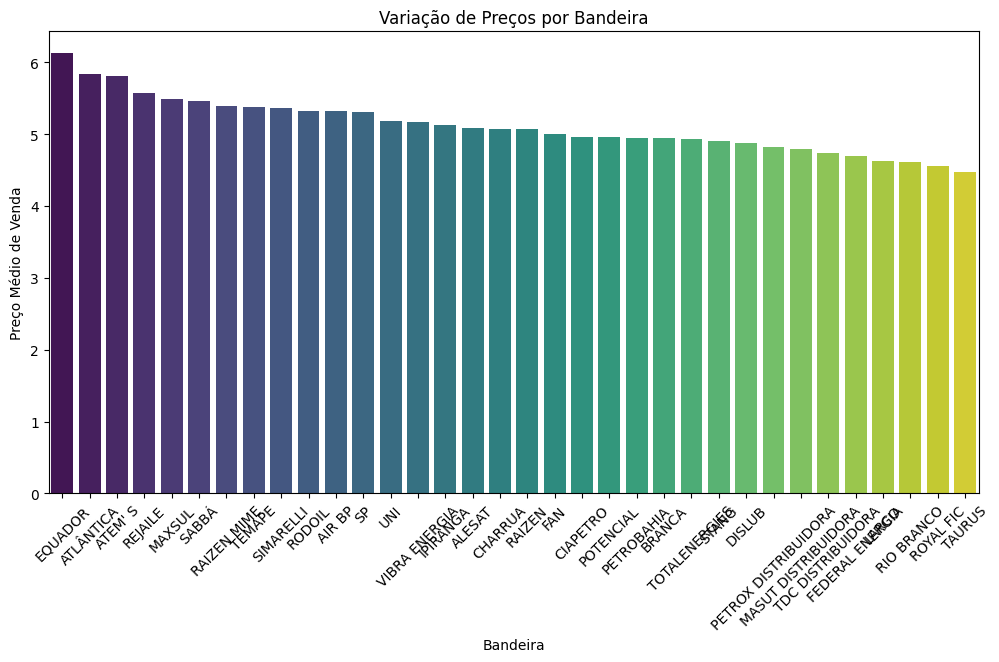

In [151]:
# Análise por bandeira: média de preços de venda
df_brand_price = df_spark.groupBy('Bandeira').agg({'Valor de Venda': 'mean'}).orderBy('avg(Valor de Venda)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_brand_price.toPandas(), x='Bandeira', y='avg(Valor de Venda)', palette='viridis')
plt.title('Variação de Preços por Bandeira')
plt.xlabel('Bandeira')
plt.ylabel('Preço Médio de Venda')
plt.xticks(rotation=45)
plt.show()


<ipython-input-152-2ac5c1f761ee>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_brand_regions.toPandas(), x='Bandeira', y='count(Regiao - Sigla)', palette='viridis')


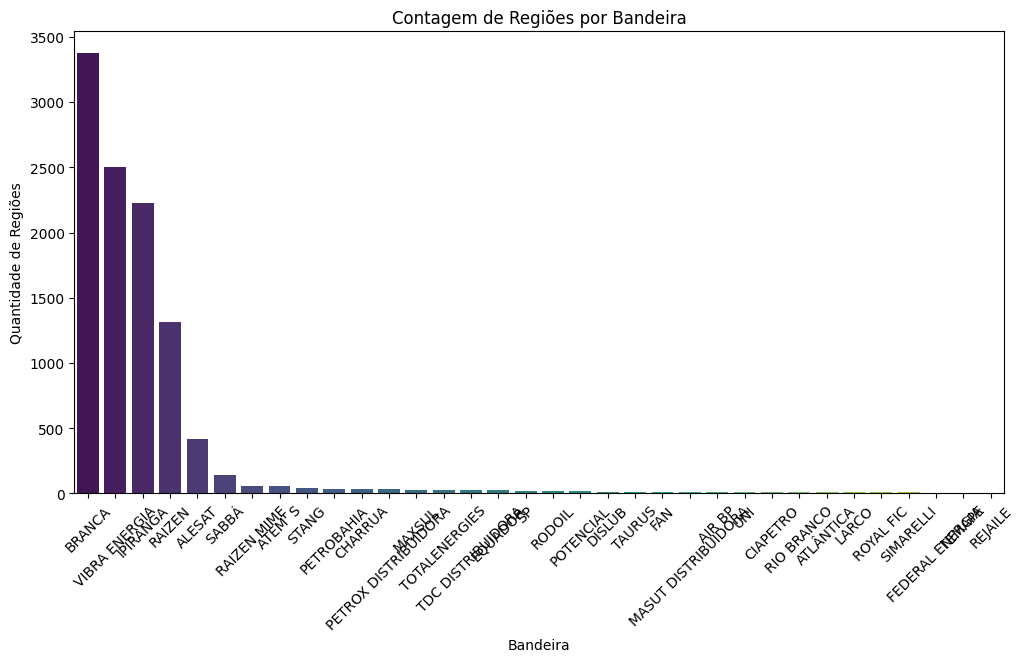

In [152]:

df_brand_regions = df_spark.groupBy('Bandeira').agg({'Regiao - Sigla': 'count'}).orderBy('count(Regiao - Sigla)', ascending=False)

# Plotando o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_brand_regions.toPandas(), x='Bandeira', y='count(Regiao - Sigla)', palette='viridis')
plt.title('Contagem de Regiões por Bandeira')
plt.xlabel('Bandeira')
plt.ylabel('Quantidade de Regiões')
plt.xticks(rotation=45)
plt.show()


# **Conversão de 'Valor de Venda' para Double no PySpark DataFrame**

Transformação da coluna para suportar cálculos precisos e operações numéricas no PySpark.

In [153]:
from pyspark.sql.functions import col

# Converte 'Valor de Venda' para double e lidar com erros
df_spark = df_spark.withColumn('Valor de Venda', df_spark['Valor de Venda'].cast('double'))


# **Remoção da Coluna 'Valor de Compra' no PySpark DataFrame**

Eliminação da variável não utilizada para simplificar e focar na análise de 'Valor de Venda'.


In [154]:
# Remove a coluna 'Valor de Compra'
df_spark = df_spark.drop('Valor de Compra')


# **Redução de Valores Não Frequentes para 'Outros' nas Principais Colunas**

Substitui valores menos frequentes por 'Outros' em colunas críticas, mantendo os dados relevantes.

In [155]:
from pyspark.sql.functions import col, when, lit

top_20_values = ['Cep', 'Bairro', 'Complemento', 'Municipio', 'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua']

for col_name in top_20_values:
    # Encontra os 20 valores mais frequentes
    top_20_counts = df_spark.groupBy(col_name).count().orderBy(col('count').desc()).limit(20)
    top_20_list = [row[col_name] for row in top_20_counts.collect()]

    # Substitui valores não frequentes por 'Outros'
    df_spark = df_spark.withColumn(col_name,
                                   when(col(col_name).isin(top_20_list), col(col_name))
                                   .otherwise(lit('Outros')))


# **Visualização de Distribuições e Contagens por Coluna**

Exploração gráfica das distribuições e contagens das variáveis, adaptada para tipos de dados numéricos e categóricos

<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-156-adf6a0b86839>:31: UserWarning: FixedFormatter should only be used together with F

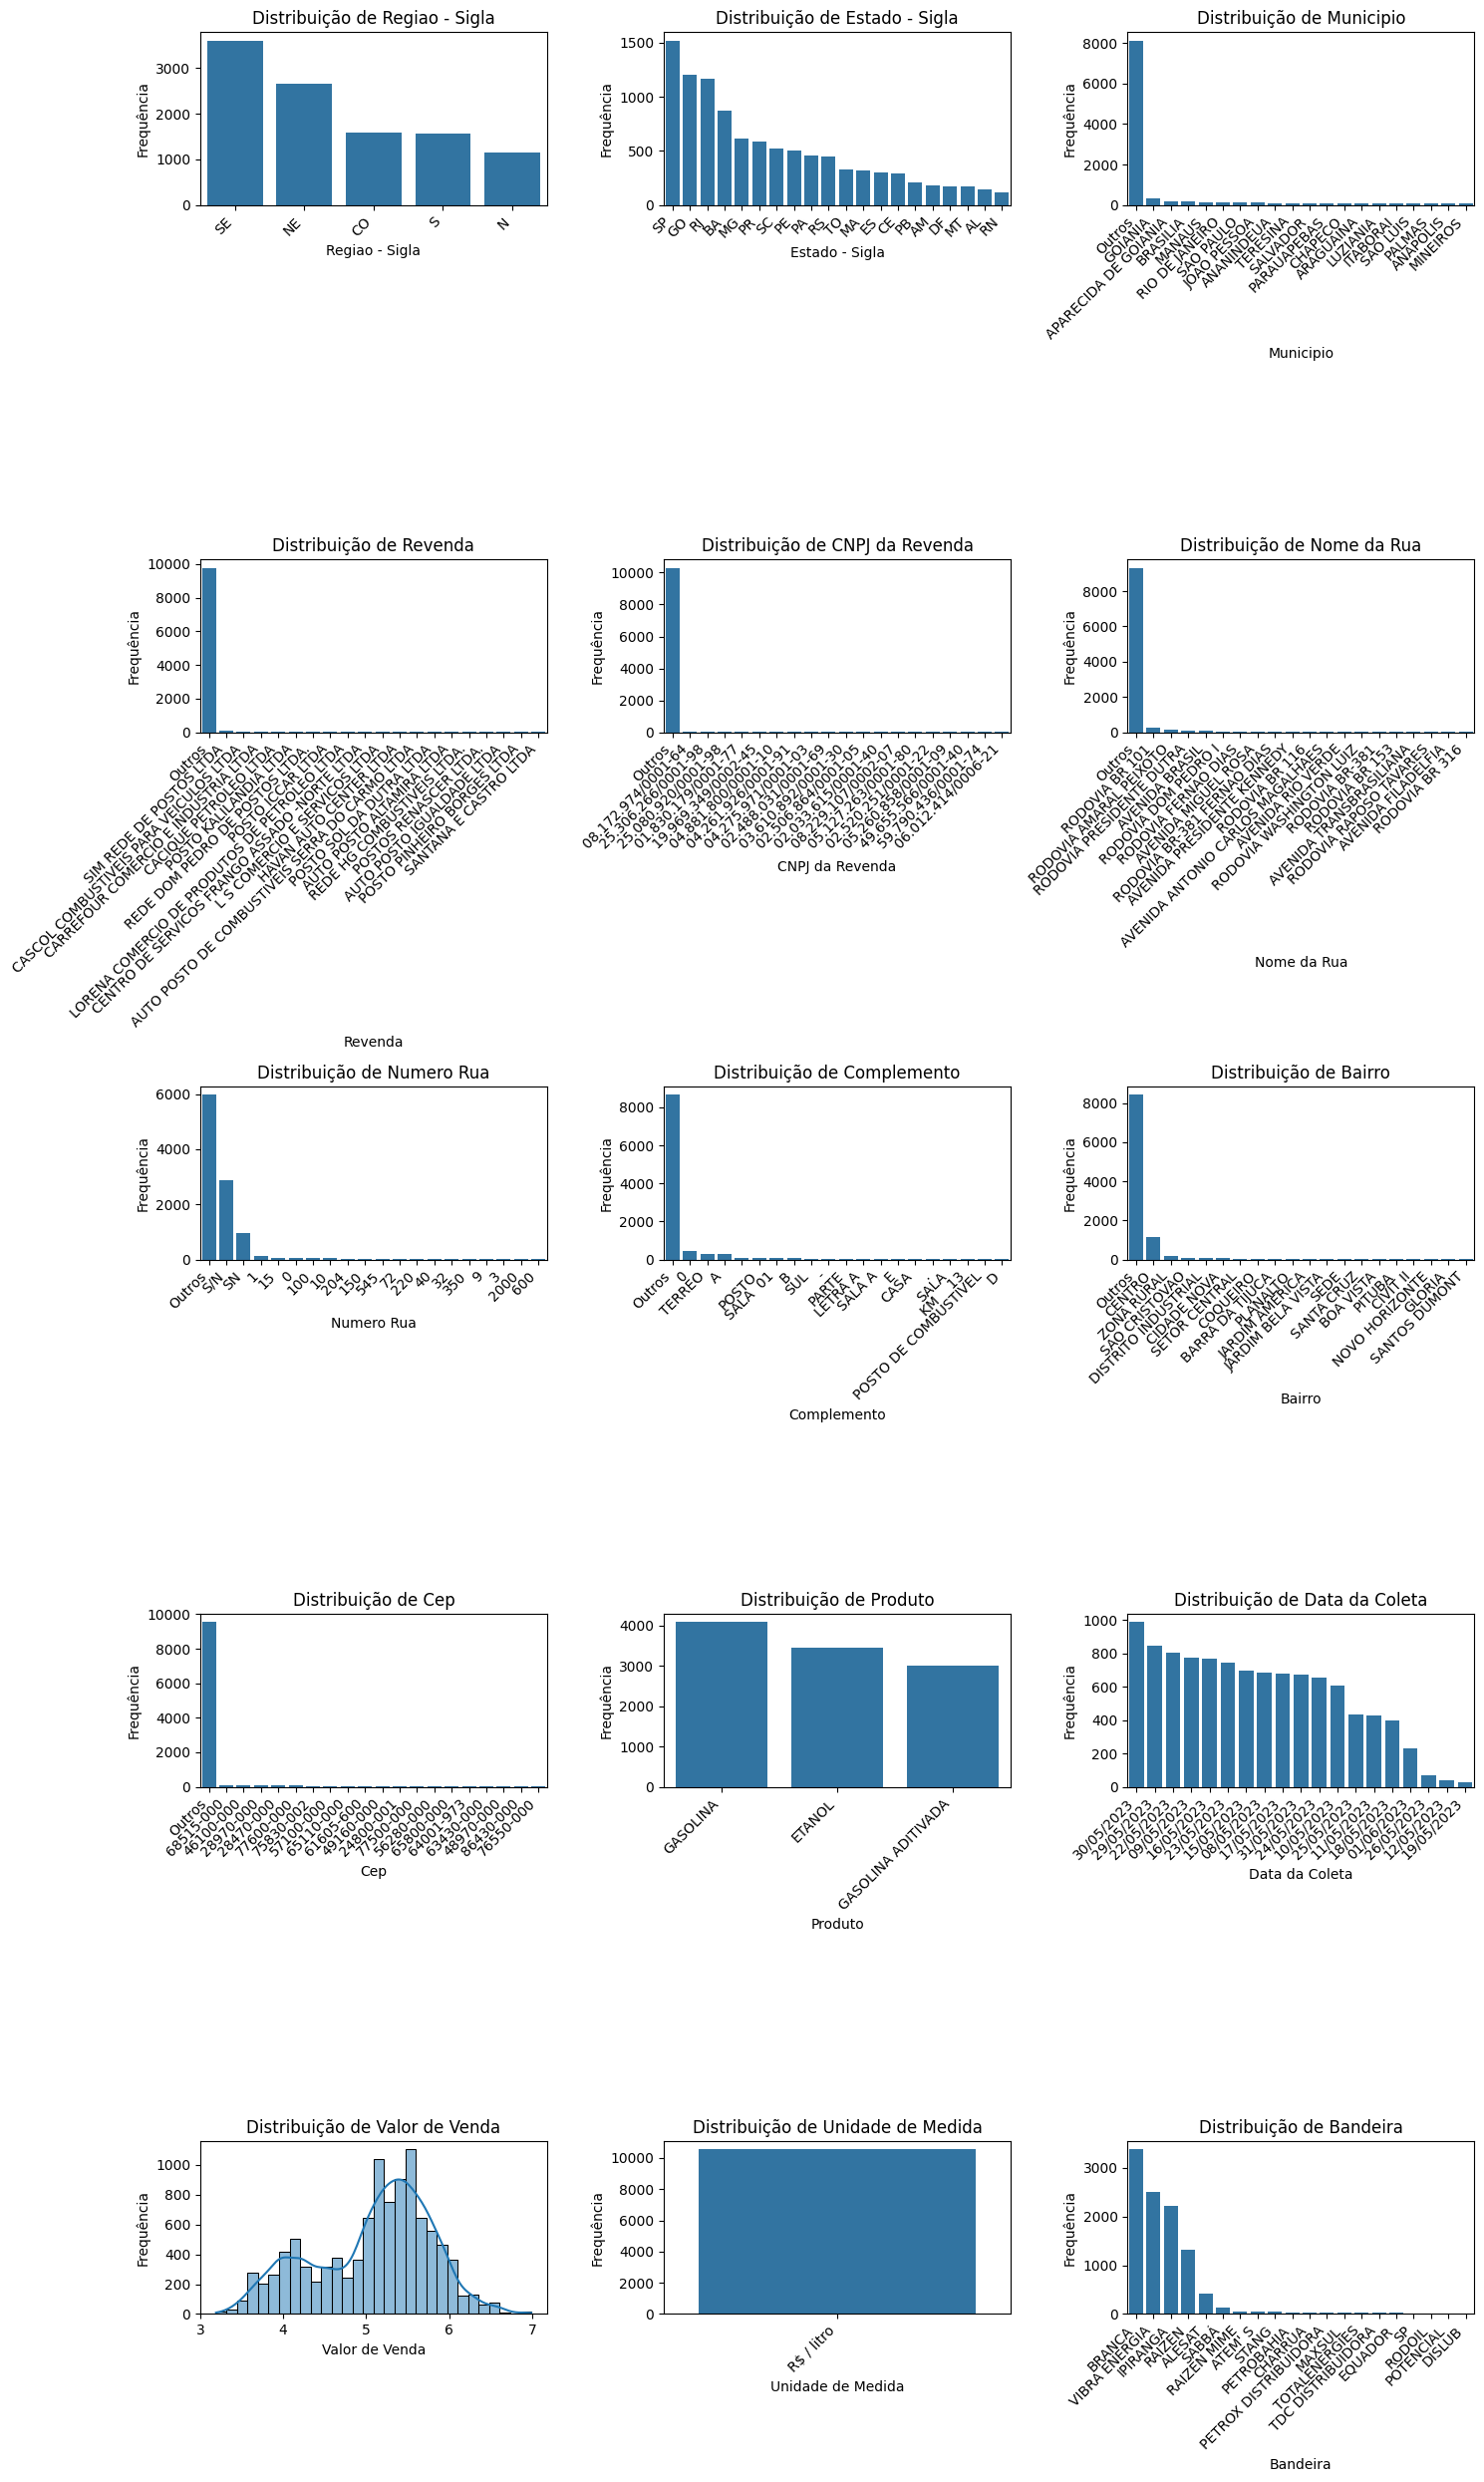

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Listagem de colunas do DataFrame Spark
columns = df_spark.columns

# Define o número de colunas e linhas para os subplots
num_cols = 3
num_rows = (len(columns) + num_cols - 1) // num_cols

# Tamanho padrão da imagem
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterar sobre cada coluna e plotar o gráfico correspondente
for i, col in enumerate(columns):
    row = i // num_cols
    col = columns[i]
    ax = axs[row, i % num_cols]

    if df_spark.schema[col].dataType.simpleString() == 'string':
        df_pd = df_spark.groupBy(col).count().orderBy('count', ascending=False).limit(20).toPandas()

        # Plot do gráfico de barras
        sns.barplot(data=df_pd, x=col, y='count', ax=ax)

        ax.set_title(f'Distribuição de {col}')

        # Ajusta rotulos(ex sigla, municipio etc)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajuste do layout (para evitar que fique feio mais uma vez)
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')
    else:
        df_pd = df_spark.select(col).toPandas()
        sns.histplot(data=df_pd, x=col, bins=30, kde=True, ax=ax)
        ax.set_title(f'Distribuição de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequência')

# Ajustes feitos no layout e espaçamento dele
plt.tight_layout()
plt.show()


# **Análise de Contingência entre Variáveis Categóricas**

Exploração das relações entre variáveis categóricas selecionadas, utilizando tabelas de contingência geradas com Spark SQL.

In [157]:
from pyspark.sql import SparkSession


# Caminho local do arquivo CSV
file_path = "/content/combustiveis (4).csv"

# Carrega o arquivo CSV para um DataFrame Spark
df_spark = spark.read.csv(file_path, sep=';', header=True, inferSchema=True)

# Seleciona apenas as colunas categóricas relevantes para a análise
categorical_cols = ['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda', 'Produto', 'Bandeira']

# Calcula as tabelas de contingência para cada par de variáveis categóricas
for i in range(len(categorical_cols)):
    for j in range(i + 1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]

        # Calcula a tabela de contingência usando Spark SQL
        contingency_table = df_spark.groupBy(col1).pivot(col2).count().na.fill(0)

        # Exibe a tabela de contingência
        print(f'Tabela de Contingência para {col1} e {col2}:')
        contingency_table.show(truncate=False)

Tabela de Contingência para Regiao - Sigla e Estado - Sigla:
+--------------+---+---+---+---+----+----+---+----+----+---+----+---+---+---+---+----+---+----+----+---+---+---+----+----+---+-----+---+
|Regiao - Sigla|AC |AL |AM |AP |BA  |CE  |DF |ES  |GO  |MA |MG  |MS |MT |PA |PB |PE  |PI |PR  |RJ  |RN |RO |RR |RS  |SC  |SE |SP   |TO |
+--------------+---+---+---+---+----+----+---+----+----+---+----+---+---+---+---+----+---+----+----+---+---+---+----+----+---+-----+---+
|NE            |0  |572|0  |0  |2518|1641|0  |0   |0   |886|0   |0  |0  |0  |605|1622|588|0   |0   |560|0  |0  |0   |0   |368|0    |0  |
|N             |134|0  |561|100|0   |0   |0  |0   |0   |0  |0   |0  |0  |940|0  |0   |0  |0   |0   |0  |524|143|0   |0   |0  |0    |469|
|S             |0  |0  |0  |0  |0   |0   |0  |0   |0   |0  |0   |0  |0  |0  |0  |0   |0  |3248|0   |0  |0  |0  |3141|2038|0  |0    |0  |
|SE            |0  |0  |0  |0  |0   |0   |0  |1041|0   |0  |5055|0  |0  |0  |0  |0   |0  |0   |3564|0  |0  |0  |0   |

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Tabela de Contingência para Estado - Sigla e Produto:
+--------------+------+--------+------------------+
|Estado - Sigla|ETANOL|GASOLINA|GASOLINA ADITIVADA|
+--------------+------+--------+------------------+
|SC            |453   |816     |769               |
|RO            |93    |240     |191               |
|PI            |188   |220     |180               |
|AM            |152   |243     |166               |
|RR            |14    |68      |61                |
|GO            |710   |713     |371               |
|TO            |148   |184     |137               |
|MT            |256   |260     |168               |
|SP            |4921  |4973    |3962              |
|PB            |219   |238     |148               |
|ES            |262   |412     |367               |
|RS            |485   |1287    |1369              |
|MS            |211   |246     |157               |
|AL            |194   |218     |160               |
|MG            |1947  |1966    |1142              |
|PA       

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Tabela de Contingência para Municipio e Produto:
+------------------------+------+--------+------------------+
|Municipio               |ETANOL|GASOLINA|GASOLINA ADITIVADA|
+------------------------+------+--------+------------------+
|SAO JOAO DE MERITI      |24    |25      |20                |
|TEIXEIRA DE FREITAS     |32    |32      |28                |
|ACAILANDIA              |16    |38      |24                |
|BRUSQUE                 |16    |21      |22                |
|FOZ DO IGUACU           |47    |41      |56                |
|LINHARES                |19    |40      |35                |
|CRUZEIRO DO SUL         |1     |1       |1                 |
|CANOAS                  |23    |68      |64                |
|ARACATUBA               |56    |53      |33                |
|ITUIUTABA               |40    |36      |15                |
|LEME                    |31    |29      |17                |
|GARANHUNS               |30    |39      |14                |
|MORRINHOS           

# **Análise de Associação entre Variáveis Categóricas com Qui-Quadrado**

Exploração da associação entre as cinco variáveis categóricas mais importantes usando tabelas de contingência e teste qui-quadrado com Spark SQL e SciPy.








In [158]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from scipy.stats import chi2_contingency

# Seleciona as cinco variáveis categóricas mais importantes
important_categorical_cols = ['Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda', 'Produto']

# Calcula tabelas de contingência e realiza o teste qui-quadrado
for i in range(len(important_categorical_cols)):
    col1 = important_categorical_cols[i]
    for j in range(i + 1, len(important_categorical_cols)):
        col2 = important_categorical_cols[j]

        # Calcula a tabela de contingência usando Spark SQL
        contingency_table = df_spark.groupBy(col1).pivot(col2).count().na.fill(0)

        # Exibe a tabela de contingência
        print(f'Tabela de Contingência para {col1} e {col2}:')
        contingency_table.show(truncate=False)

        # Converte a tabela de contingência para Pandas para aplicar o teste qui-quadrado
        contingency_pd = contingency_table.toPandas().set_index(col1)

        # Realiza o teste qui-quadrado para avaliar a associação entre as variáveis
        chi2, p, _, _ = chi2_contingency(contingency_pd.values)
        print(f"Teste qui-quadrado para {col1} e {col2}:")
        print(f"Qui-quadrado: {chi2}")
        print(f"Valor p: {p}")
        print("\n")

# Acabou!!!!!!!
spark.stop()

Tabela de Contingência para Regiao - Sigla e Estado - Sigla:
+--------------+---+---+---+---+----+----+---+----+----+---+----+---+---+---+---+----+---+----+----+---+---+---+----+----+---+-----+---+
|Regiao - Sigla|AC |AL |AM |AP |BA  |CE  |DF |ES  |GO  |MA |MG  |MS |MT |PA |PB |PE  |PI |PR  |RJ  |RN |RO |RR |RS  |SC  |SE |SP   |TO |
+--------------+---+---+---+---+----+----+---+----+----+---+----+---+---+---+---+----+---+----+----+---+---+---+----+----+---+-----+---+
|NE            |0  |572|0  |0  |2518|1641|0  |0   |0   |886|0   |0  |0  |0  |605|1622|588|0   |0   |560|0  |0  |0   |0   |368|0    |0  |
|N             |134|0  |561|100|0   |0   |0  |0   |0   |0  |0   |0  |0  |940|0  |0   |0  |0   |0   |0  |524|143|0   |0   |0  |0    |469|
|S             |0  |0  |0  |0  |0   |0   |0  |0   |0   |0  |0   |0  |0  |0  |0  |0   |0  |3248|0   |0  |0  |0  |3141|2038|0  |0    |0  |
|SE            |0  |0  |0  |0  |0   |0   |0  |1041|0   |0  |5055|0  |0  |0  |0  |0   |0  |0   |3564|0  |0  |0  |0   |

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Teste qui-quadrado para Estado - Sigla e Revenda:
Qui-quadrado: 1217224.4491720987
Valor p: 0.0


Tabela de Contingência para Estado - Sigla e Produto:
+--------------+------+--------+------------------+
|Estado - Sigla|ETANOL|GASOLINA|GASOLINA ADITIVADA|
+--------------+------+--------+------------------+
|SC            |453   |816     |769               |
|RO            |93    |240     |191               |
|PI            |188   |220     |180               |
|AM            |152   |243     |166               |
|RR            |14    |68      |61                |
|GO            |710   |713     |371               |
|TO            |148   |184     |137               |
|MT            |256   |260     |168               |
|SP            |4921  |4973    |3962              |
|PB            |219   |238     |148               |
|ES            |262   |412     |367               |
|RS            |485   |1287    |1369              |
|MS            |211   |246     |157               |
|AL            |

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Teste qui-quadrado para Municipio e Revenda:
Qui-quadrado: 20567326.762108576
Valor p: 0.0


Tabela de Contingência para Municipio e Produto:
+------------------------+------+--------+------------------+
|Municipio               |ETANOL|GASOLINA|GASOLINA ADITIVADA|
+------------------------+------+--------+------------------+
|SAO JOAO DE MERITI      |24    |25      |20                |
|TEIXEIRA DE FREITAS     |32    |32      |28                |
|ACAILANDIA              |16    |38      |24                |
|BRUSQUE                 |16    |21      |22                |
|FOZ DO IGUACU           |47    |41      |56                |
|LINHARES                |19    |40      |35                |
|CRUZEIRO DO SUL         |1     |1       |1                 |
|CANOAS                  |23    |68      |64                |
|ARACATUBA               |56    |53      |33                |
|ITUIUTABA               |40    |36      |15                |
|LEME                    |31    |29      |17        

**Tabela de Contingência:**

A tabela mostra a frequência de observações em cada combinação de categorias entre "Regiao - Sigla" e "Estado - Sigla".
Por exemplo, para a região "NE" e o estado "AL", há 572 observações.

Valor do Qui-Quadrado:

O valor do qui-quadrado é 21452.603, que é bastante alto.
Um valor de qui-quadrado elevado indica um grande desvio entre as frequências observadas e as frequências esperadas, sugerindo uma possível associação entre as variáveis.

Valor-p:

O valor-p é 0.0, o que significa que a probabilidade de obter um valor de qui-quadrado tão extremo (ou mais extremo) devido ao acaso é praticamente zero.
Um valor-p menor que 0.05 (ou outro nível de significância definido) leva à rejeição da hipótese nula.

Conclusão:

Dado o alto valor do qui-quadrado e o valor-p muito pequeno, rejeitamos a hipótese nula de independência.
Concluímos que há uma associação significativa entre "Regiao - Sigla" e "Estado - Sigla". Em outras palavras, a distribuição dos estados não é independente da distribuição das regiões.